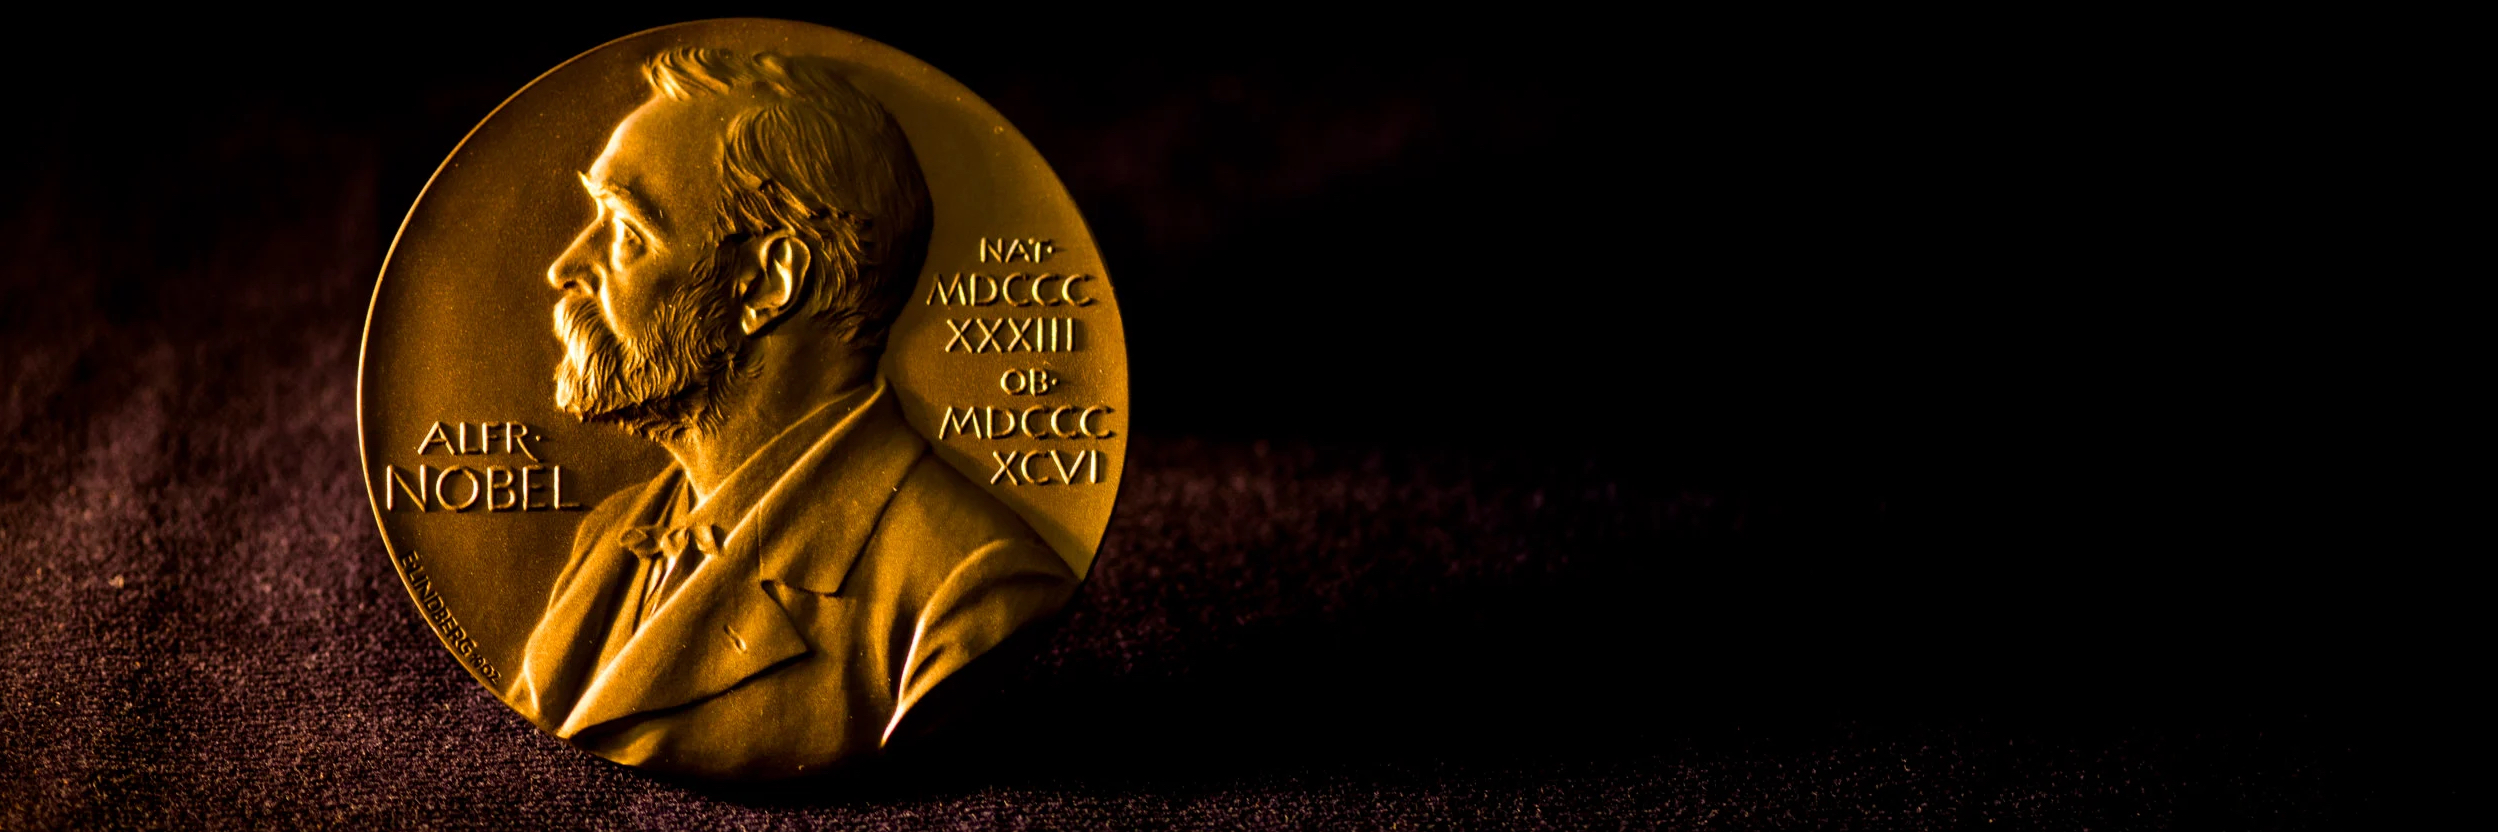

# **Final project - data analysis**
## **Subject: Nobel Prize winners and their achievements**
###Group No. 12 | Hosted by: Oriel Kahana, Daniel Tugendhaft and Elad Shilat
---
### Parts:

- [Foreword](#foreword)



1. [Processing the data](#section1)

    1.1 [Fit the data](#section1.1)
    1.2 [Handling missing values](#section1.2)

2. [Some background to the data](#section2)

    2.1 [](#section2.1)
    2.2 [](#section2.2)
    2.3 [](#section2.3)
    2.4 [](#section2.4)

2. [Conclusions:](#section3)

    3.1 [First conclusion](#section3.1)
    3.2 [Second conclusion](#section3.2)
    3.3 [Third conclusion](#section3.3)
    3.4 [Fourth conclusion](#section3.4)

<a id='foreword'></a>
## Foreword:

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.graph_objects as go
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [57]:
url = 'https://raw.githubusercontent.com/danitugi/datanlysis_project/main/nobel_price%20-%208_6.csv'
nobel_df = pd.read_csv(url)
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,n_birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,n_death_country,religion
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,Germany,Christian
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,France,Christian
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,Germany,Christian
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,France,Christian
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,Switzerland,Christian


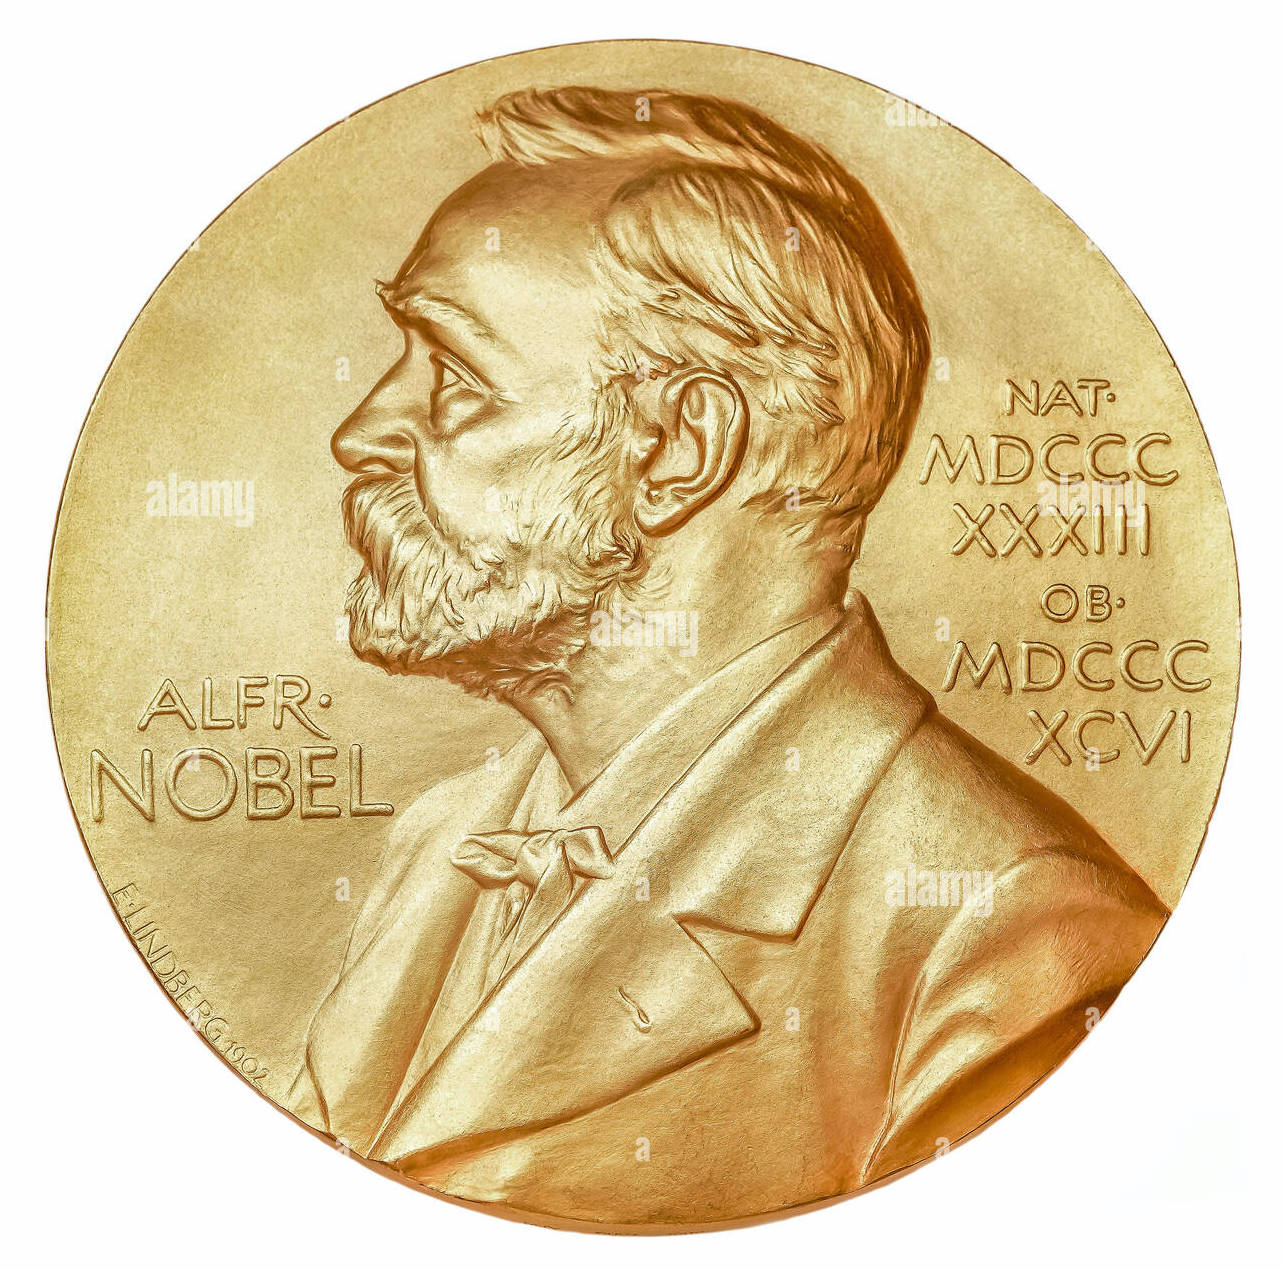

<a id='section1'></a>
## 1. Processing the data

<a id='section1.1'></a>
### 1.1 Fit the data

In [58]:
nobel_df['birth_date'] = pd.to_datetime(nobel_df['birth_date'], format='%Y-%m-%d')
nobel_df['age'] = nobel_df['year'] - nobel_df['birth_date'].dt.year

In [59]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            911 non-null    datetime64[ns]
 9   birth_city            909 non-null    object        
 10  birth_country         911 non-null    object        
 11  n_birth_country       911 non-null    object        
 12  sex                   911 non-null    object        
 13  organization_name   

<a id='section1.2'></a>
### 1.2 Handling missing values

In [60]:
nobel_df.isnull().sum().to_frame('nulls')

,nulls
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_id,0
laureate_type,0
full_name,0
birth_date,0
birth_city,2


In [61]:
nobel_df = nobel_df.fillna('Unknown')

In [62]:
df_no_org = nobel_df.loc[nobel_df.sex != 'Org']
df_nobell = df_no_org.copy()

<a id='section2'></a>
## 2. Some background to the data

<a id='section2.1'></a>
### 2.1

In [63]:
df1 = nobel_df.groupby(['n_birth_country', 'organization_country'])['full_name'].count().reset_index()
df1.columns = ['source', 'target', 'value']
df2 = nobel_df.groupby(['sex', 'category'])['full_name'].count().reset_index()
df2.columns = ['source', 'target', 'value']
links = pd.concat([df2], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)
links_dict = links.to_dict(orient='list')
color_link = ['#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5','#D1EEEE','#BDFCC9','#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5','#D1EEEE','#BDFCC9','#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5','#D1EEEE','#BDFCC9']
fig = go.Figure(data=[go.Sankey(
    node = dict(
      line = dict(color = "#C6E2FF", width = 1),
      label = unique_source_target,
      color = "white"
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"],
      color = color_link
  ))])
fig.update_layout(title_text="sex-category Sankey Diagram", font_size=10)
fig.show()

<Axes: xlabel='sex', ylabel='count'>

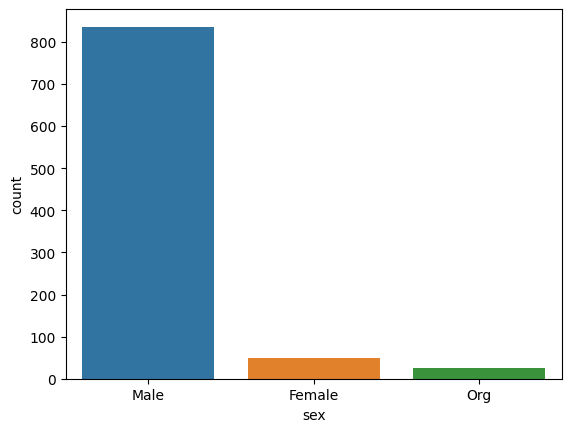

In [64]:
sns.countplot(data = nobel_df, x= 'sex')

- אפשר לראות את החלוקה בין גברים לנשים, רואים פער משמעותי "לטובת" הגברים - שיש לנו 836 גברים לעומת 49 נשים, ויש לנו 26 ארגונים שזכו בפרס

<a id='section2.2'></a>
### 2.2

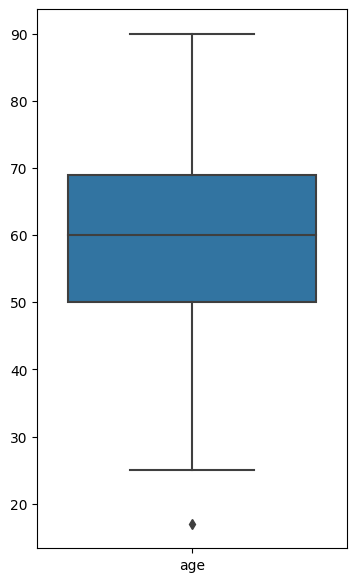

In [65]:
plt.figure(figsize=(4,7))
g = sns.boxplot(data = df_nobell[['age' ]])

: 17 גיל = ניתן לראות כי יש חריגה בקטגוריית הגיל, יש לנו חריגה של זוכה בגיל
   מלאלה יוסופזאי הייתה בת 17 בלבד כאשר זכתה בפרס נובל לשלום לשנת 2014 והיא הזוכה הצעירה ביותר בפרס נובל מאז היווסדו ,

In [66]:
df_17 = nobel_df[nobel_df['age']==17]
df_17.motivation.unique()

array(['"for their struggle against the suppression of children and young people and for the right of all children to education"'],
      dtype=object)

"על מאבקם נגד דיכוי ילדים וצעירים ולמען זכותם של כל הילדים לחינוך"

<a id='section2.3'></a>
### 2.3

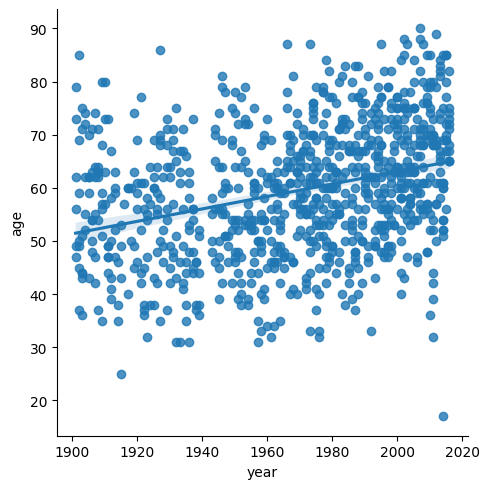

In [67]:
sns.lmplot(data=df_no_org, x='year', y='age')

בני כמה הזוכים? אפשר לראות שהמסה העיקרית של הזוכים היא בין גיל 50 -65 ואפשר לראות שעם השנים גיל הזכיה רק עולה ועלה

<a id='section3'></a>
## 3. Conclusions

<a id='section3.1'></a>
### 3.1 Conclusion no. 1 - The winning age

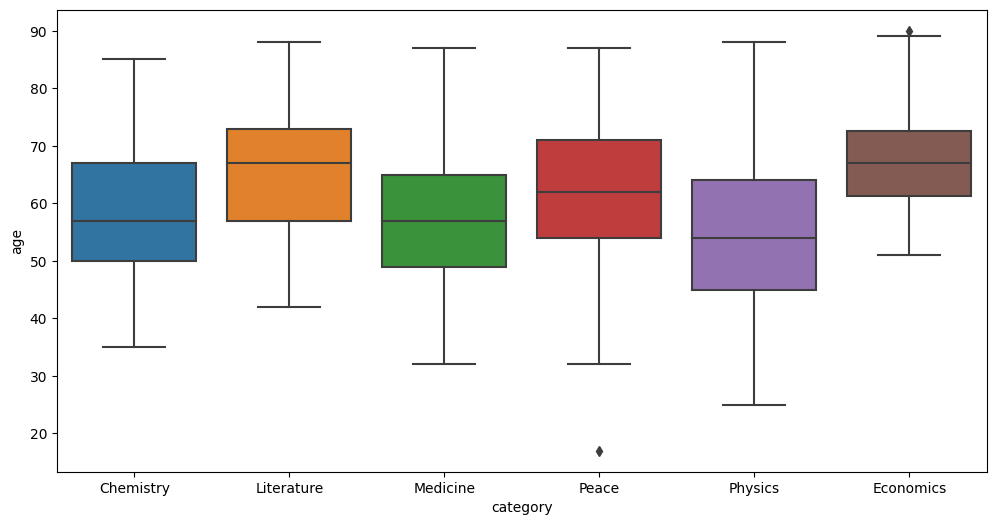

In [68]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df_no_org, y='age', x='category')

plt.show()

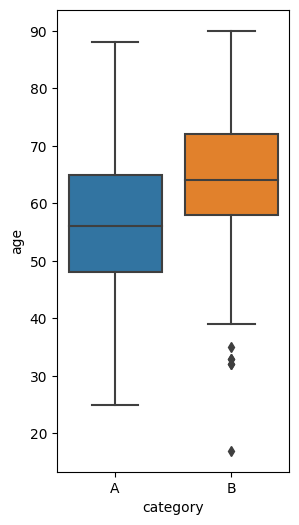

In [69]:
#Division by categories - group A: chemistry, medicine and physics and group B: peace, literature and economics
nobel_AB = df_nobell.copy()
nobel_AB.replace(['Chemistry','Medicine','Physics'],'A' ,inplace=True)
nobel_AB.replace(['Peace','Literature','Economics'],'B' ,inplace=True)
plt.figure(figsize=(3,6))

sns.boxplot(data=nobel_AB, y='age', x='category')

plt.show()


> מסקנה מספר 1


לקחנו את הדאטה ופילחנו עפ״י קטגוריות את גיל הזכייה הממוצע, ושמנו לב לחלוקה בין שני קבוצות זכייה: 1.פיזיקה כימיה ורפואה. 2. ספרות שלום וכלכלה.
והסקנו כי ישנו הבדל בין שתי הקבוצות, הקבוצה הראשונה מאופיינת יותר בחשיבה לוגית וזיכרון לעומת הקבוצה השנייה שמאופיינת יותר בניסיון וסחיפת קהל ולכן נוצר פער הגילאים. הקבוצה הראשונה עם ממוצע גילאים יותר נמוך מהקבוצה השנייה.





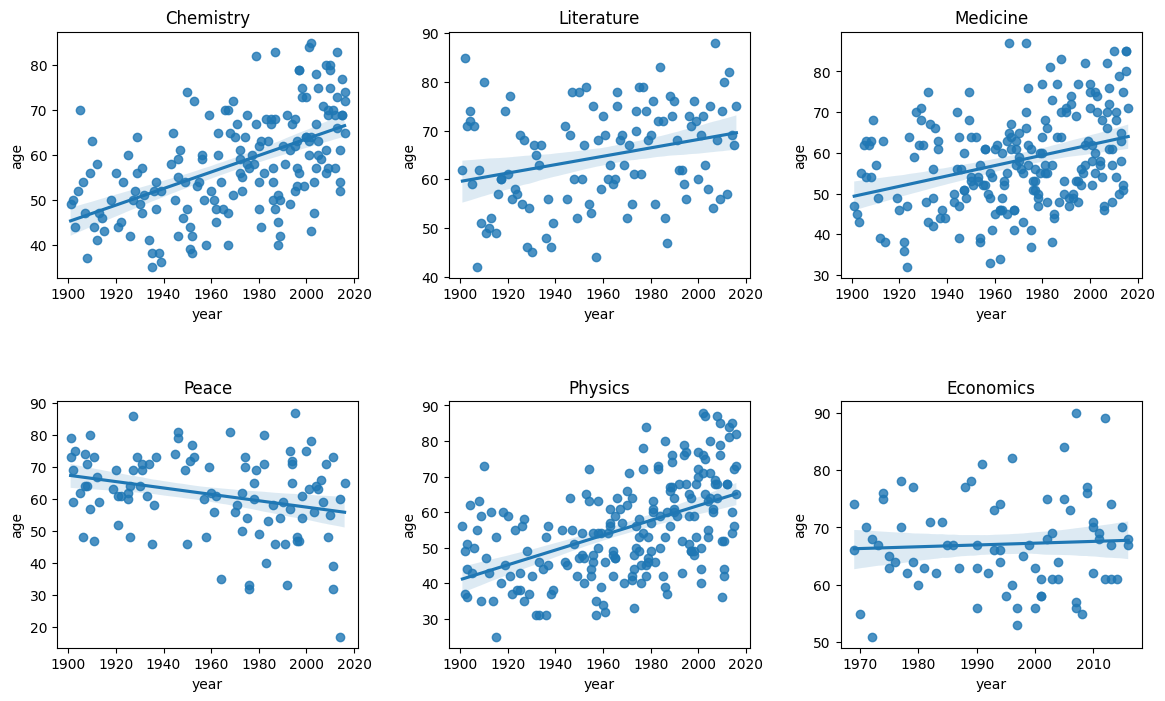

In [71]:
fig, ax = plt.subplots(2, 3, figsize=(14, 8))
sns.regplot(x='year', y='age', data=nobel_df[nobel_df['category']=='Chemistry'], ax=ax[0, 0])
ax[0,0].set_title("Chemistry")
sns.regplot(x='year', y='age', data=nobel_df[nobel_df['category']=='Literature'], ax=ax[0, 1])
ax[0,1].set_title("Literature")
sns.regplot(x='year', y='age', data=nobel_df[nobel_df['category']=='Medicine'], ax=ax[0, 2])
ax[0,2].set_title("Medicine")
sns.regplot(x='year', y='age', data=df_no_org[df_no_org['category']=='Peace'], ax=ax[1, 0])
ax[1,0].set_title("Peace")
sns.regplot(x='year', y='age', data=nobel_df[nobel_df['category']=='Physics'], ax=ax[1, 1])
ax[1,1].set_title("Physics")
sns.regplot(x='year', y='age', data=nobel_df[nobel_df['category']=='Economics'], ax=ax[1, 2])
ax[1,2].set_title("Economics")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

> סעיף במסקנה מספר 1

חקרנו עוד קצת את עניין הגיל ומצאנו כי בקטגוריית ה׳שלום׳ ישנה ירידה בממוצע הגיל לאורך השנים, ובשאר הקטגוריות המצב הפוך - דבר הגיוניבהתחשב כי תוחלת החיים עולה
מה שמוביל אותנו לחשוב שבתחום השינוי החברתי והובלת הציבור הצעירים לוקחים חלק יותר ויותר. עם הרשתות החברתיות שמשפיעות ו״העדר״ המלחמות.

גיל הממוצע של חתני פרס נובל בפיזיקה,כימיה,רפואה,ספרות,וכלכלה גדל באופן ניכר עם הזמן, קטגוריית פרס נובל לשלום היא היחידה שבה הגיל הממוצע יורד עם הזמן.

עם תזכורת של הנערה בת ה-17 שזכתה, חותם שהגישה בנושא השתנתה.

<a id='section3.2'></a>
### 3.2 Conclusion no. 2 - Entry of women as winners

<Axes: xlabel='year', ylabel='Count'>

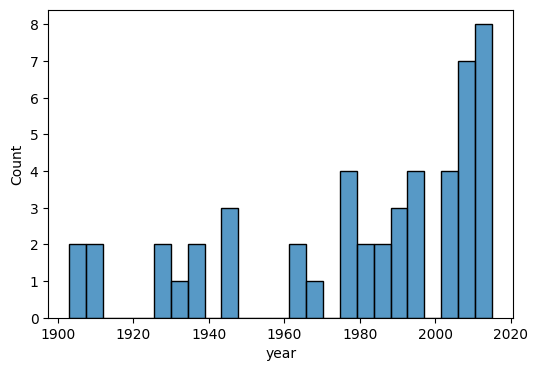

In [72]:

plt.figure(figsize=(6,4))
sns.histplot(data=nobel_df[nobel_df.sex == 'Female'], x='year' ,bins = 25)


(1901.0, 2000.0)

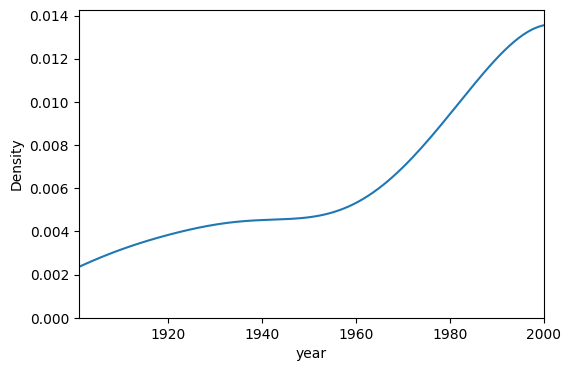

In [97]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=nobel_df[(nobel_df.sex == 'Female') & (nobel_df.year <= 2016)], x='year')
plt.xlim(nobel_df.year.min(), 2000)


> מסקנה מספר 3

בגרף שלפנינו אנחנו רואים עליה משנת 1980 בנשים הזוכות בפרסי נובל, חקרנו את העניין וגילינו שבשנים הללו נשים יותר ויותר השתלבו באקדמיה ומחקר וכו,  והוקמו לשם כך מגמות מיוחדות "ללימודי נשים" על השקפת עולם ומחקר "פמינסטי" ומטרתם היתה לשפר את מעמדם של הנשים בחברה ובתחומי המחקר והאקדמיה, והנה התוצאות לפנינו -  שמשנת 2000 כבר רואים עליה  משמעותית בנשים הזוכות.אם כך אפשר להגיד שאם נרצה לקחת אוכלוסיות \ קבוצות ולהביא להם תאפשרות גם לזכות בפרסי נובל, אז נדע את שלבי העבודה בנושא.

<a id='section3.3'></a>
### 3.3 Conclusion no. 3 - The connection between the winner and his religion

In [73]:
df_nobell['religion'].replace(['A reformist','Maya'],'Other', inplace=True)
df_nobell['religion'].replace(['Agnostic','Atheist'],'Atheist&Agnostic', inplace=True)
df_nobell.religion.unique()

array(['Christian', 'Jewish', 'Other', 'Unknown', 'Hindu',
       'Atheist&Agnostic', 'Buddhist', 'Moslem'], dtype=object)

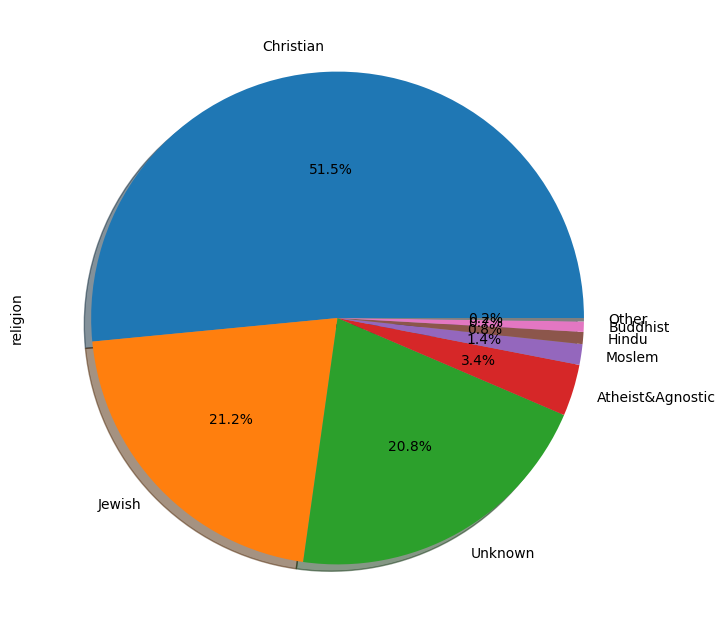

In [74]:
df_nobell['religion'].replace([0,1,2,3,4,5,6,7],['Christian', 'Jewish', 'Other', 'Unknown', 'Hindu',
       'Atheist&Agnostic', 'Buddhist', 'Moslem'], inplace=True)
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sex_percent = df_nobell['religion'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True)



> היהודים מהווים כ-21% מכלל הזוכים בפרס נובל.




<Axes: xlabel='category', ylabel='count'>

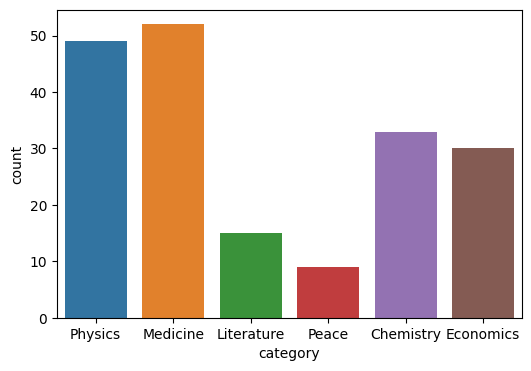

In [75]:
plt.figure(figsize=(6,4))
sns.countplot(data=nobel_df[nobel_df.religion == 'Jewish'], x='category')

> גרף כמות זוכים יהודים בכל קטגוריה

עפ״י הנתונים אחוז הזוכים היהודים בכל קטגוריה: כלכלה 39%, רפואה 26%, פיזיקה 26%, כימיה 19%, ספרות 14% ושלום 8%.

כמו שאנחנו יודעים, שלום זה לא הצד החזק שלנו עד כה.


### But what is the quantitative ratio between the Jews and the world's population?

In [76]:
url = 'https://raw.githubusercontent.com/danitugi/datanlysis_project/main/religious_populations.csv'
relig_df = pd.read_csv(url)
selected_rows = relig_df.iloc[list(range(5)) + [10]]
selected_rows

,Religion,Adherents (in millions),Percentage
0,Christianity,2382.0,31.11%
1,Islam,1907.0,24.90%
2,Secular[a]/Nonreligious[b]/Agnostic/Atheist,1193.0,15.58%
3,Hinduism,1161.0,15.16%
4,Buddhism,506.0,5.06%
10,Judaism,14.7,0.18%


In [77]:
sum_by_religion = df_nobell['religion'].value_counts()
sum_by_religion

Christian           456
Jewish              188
Unknown             184
Atheist&Agnostic     30
Moslem               12
Hindu                 7
Buddhist              6
Other                 2
Name: religion, dtype: int64

In [79]:
selected_rows['num_win'] = [456,12,30,7,6,188]
selected_rows['winners_per_million'] = selected_rows['num_win']/selected_rows['Adherents (in millions)']
selected_rows = selected_rows.sort_values(by=['winners_per_million'],ascending=False)
selected_rows

,Religion,Adherents (in millions),Percentage,num_win,winners_per_million
10,Judaism,14.7,0.18%,456,31.020408
3,Hinduism,1161.0,15.16%,188,0.161929
2,Secular[a]/Nonreligious[b]/Agnostic/Atheist,1193.0,15.58%,30,0.025147
4,Buddhism,506.0,5.06%,7,0.013834
0,Christianity,2382.0,31.11%,12,0.005038
1,Islam,1907.0,24.90%,6,0.003146



> מסקנה מספר 3

היהודים מהווים כ-21 אחוזים מכלל הזוכים!

ניתן לראות לא רק שהיהודים תופסים אחוז גדול מהזוכים בפרסי נובל(21.2%), אלא גם שכמות הזוכים היהודים ביחס לכמות היהודים בעולם היא אדירה, בין 12 ל13 זוכים לכל מיליון יהודים, הדת הבאה הכי קרובה היא הנצרות בה יש זוכה לכל 5 מיליון! פער של פי 66.

In [80]:
J_df = nobel_df[nobel_df.religion == 'Jewish']
df1 = J_df.groupby(['n_birth_country', 'organization_country'])['full_name'].count().reset_index()
df1.columns = ['source', 'target', 'value']
df2 = J_df.groupby(['organization_country', 'n_death_country'])['full_name'].count().reset_index()
df2.columns = ['source', 'target', 'value']
links = pd.concat([df1], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)
links_dict = links.to_dict(orient='list')
color_link = ['#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5','#D1EEEE','#BDFCC9','#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5','#D1EEEE','#BDFCC9','#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5','#D1EEEE','#BDFCC9']
fig = go.Figure(data=[go.Sankey(
    node = dict(
      line = dict(color = "#C6E2FF", width = 1),
      label = unique_source_target,
      color = "white"
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"],
      color = color_link
  ))])
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

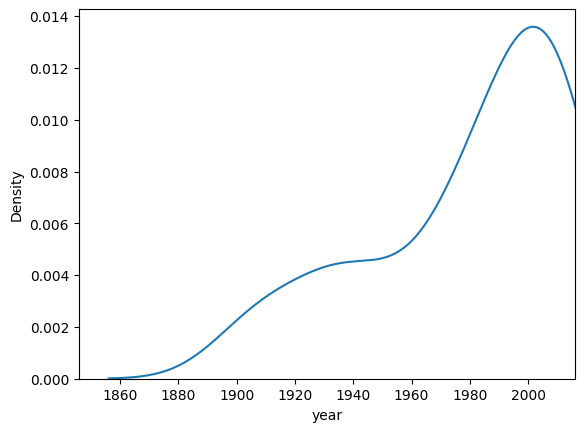

In [84]:
sns.kdeplot(data=nobel_df[nobel_df.sex == 'Female'], x='year')
plt.xlim(None, 2016)
plt.show()

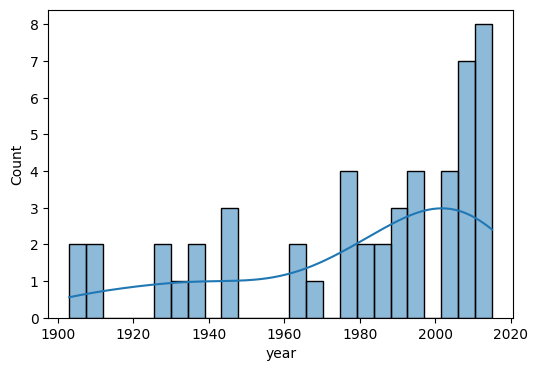

In [85]:

plt.figure(figsize=(6, 4))
sns.histplot(data=nobel_df[nobel_df.sex == 'Female'], x='year', bins=25, kde=True)
plt.show()

<Axes: xlabel='year', ylabel='Density'>

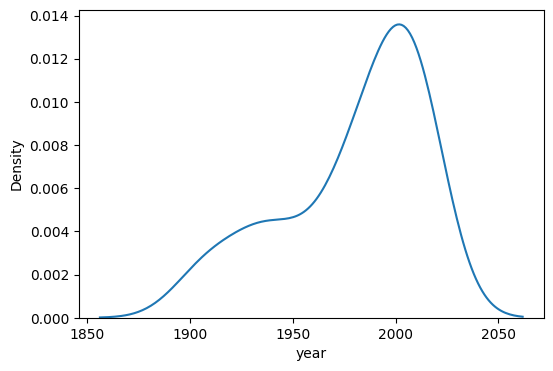

In [86]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=nobel_df[nobel_df.sex == 'Female'], x='year')


(1901.0, 2000.0)

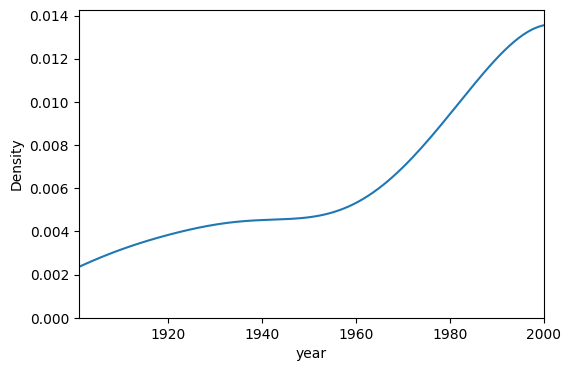

In [96]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=nobel_df[(nobel_df.sex == 'Female') & (nobel_df.year <= 2016)], x='year')
plt.xlim(nobel_df.year.min(), 2000)
